In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii
import os

In [2]:
data = ascii.read('Binned_data/lcparam_DS17f.txt', names=['name', 'zcmb', 'zhel', 'dz', 
                                                          'mb', 'dmb', 'x1', 'dx1', 
                                                          'color', 'dcolor', '3rdvar', 'd3rdvar', 
                                                          'cov_m_s', 'cov_m_c', 'cov_s_c', 'set', 
                                                          'ra', 'dec'])
stat_err = data['zcmb']

In [3]:
data

name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec
int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
0,0.014,0.014,0.0,14.57001926,0.0311,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0194,0.0194,0.0,15.2279603507,0.02645,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0264,0.0264,0.0,15.934102317,0.0231,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0329,0.0329,0.0,16.4217829558,0.0235,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0396,0.0396,0.0,16.836418956,0.02845,0,0,0,0,0,0,0,0,0,0,0,0
5,0.0475,0.0475,0.0,17.2346439906,0.0334,0,0,0,0,0,0,0,0,0,0,0,0
6,0.056,0.056,0.0,17.5758459622,0.03215,0,0,0,0,0,0,0,0,0,0,0,0
7,0.064,0.064,0.0,17.9104543501,0.0439,0,0,0,0,0,0,0,0,0,0,0,0
8,0.0721,0.0721,0.0,18.1780074589,0.03865,0,0,0,0,0,0,0,0,0,0,0,0


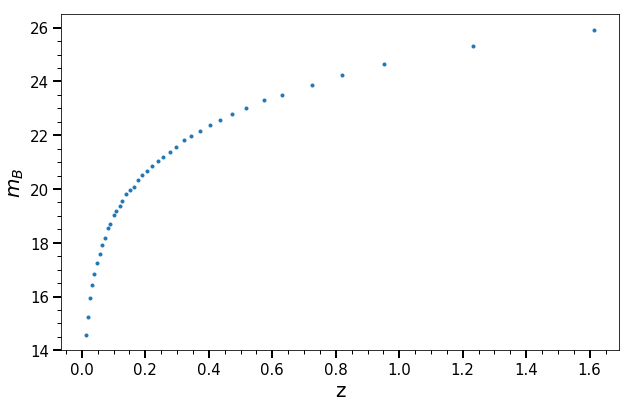

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 12,
          'figure.figsize': (15, 5),
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}
plt.rcParams.update(params)
axs.plot(data['zcmb'],data['mb'],'.')
axs.set_xlabel('z', size=20)
axs.set_ylabel(r'$m_B$', size=20)
#axs.set_xscale('log')
axs.minorticks_on()
axs.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
axs.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
#axs.grid(True)

In [5]:
sys_error = ascii.read('Binned_data/sys_DS17f.txt')
sys_error = sys_error['40']

In [6]:
files = open("Binned_data/sys_DS17f.txt")
lines = files.readlines()
files.close()

array = []
cnt = 0 
line = []

for i in np.arange(np.size(sys_error)):
    cnt += 1
    #print(cnt)
    line.append(sys_error[i])
    if cnt % 40 == 0:
        cnt = 0
        if len(line) > 0:
            array.append(line)
        line = []
        
#print(array)

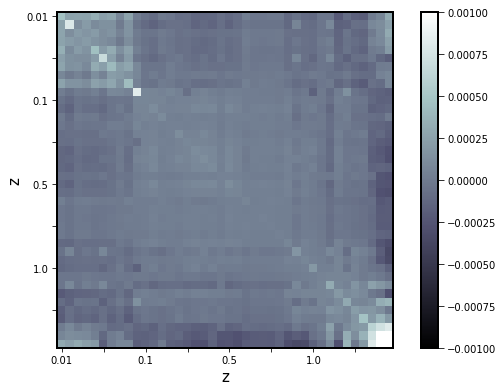

In [7]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
imgplot = plt.imshow(array, cmap='bone', vmin=-0.001, vmax=0.001)   
ax1.set_xticklabels(['', 0.01,'',0.1,'',.50,'',1.0,'',10.0])
ax1.set_yticklabels(['', 0.01,'',0.1,'',.50,'',1.0,'',2.0])
ax1.set_xlabel('z')
ax1.set_ylabel('z')
plt.colorbar()

In [8]:
import likelihood

In [9]:
stat_err, sys_err, tot_err, Chi2 = likelihood.likelihood_cal(par = [], dat_dir=os.getcwd() + '/Binned_data/', 
                                                             ifsys=True)

In [10]:
stat_err

matrix([[0.0311 , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.02645, 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.0231 , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.     , 0.     , 0.     , ..., 0.0276 , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.05635, 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.0735 ]])

In [11]:
sys_err

matrix([[4.550000e-04, 2.604450e-04, 2.728900e-04, ..., 1.010500e-05,
         7.052000e-05, 2.991250e-04],
        [2.604450e-04, 7.944400e-04, 1.326800e-04, ..., 8.776500e-05,
         1.174200e-04, 2.373850e-04],
        [2.728900e-04, 1.326800e-04, 2.166850e-04, ..., 1.490000e-06,
         1.019800e-04, 3.108300e-04],
        ...,
        [1.010500e-05, 8.776500e-05, 1.490000e-06, ..., 6.024750e-04,
         7.305850e-04, 8.186400e-04],
        [7.052000e-05, 1.174200e-04, 1.019800e-04, ..., 7.305850e-04,
         2.527705e-03, 2.599130e-03],
        [2.991250e-04, 2.373850e-04, 3.108300e-04, ..., 8.186400e-04,
         2.599130e-03, 3.628650e-03]])

In [12]:
tot_err

matrix([[3.1555000e-02, 2.6044500e-04, 2.7289000e-04, ..., 1.0105000e-05,
         7.0520000e-05, 2.9912500e-04],
        [2.6044500e-04, 2.7244440e-02, 1.3268000e-04, ..., 8.7765000e-05,
         1.1742000e-04, 2.3738500e-04],
        [2.7289000e-04, 1.3268000e-04, 2.3316685e-02, ..., 1.4900000e-06,
         1.0198000e-04, 3.1083000e-04],
        ...,
        [1.0105000e-05, 8.7765000e-05, 1.4900000e-06, ..., 2.8202475e-02,
         7.3058500e-04, 8.1864000e-04],
        [7.0520000e-05, 1.1742000e-04, 1.0198000e-04, ..., 7.3058500e-04,
         5.8877705e-02, 2.5991300e-03],
        [2.9912500e-04, 2.3738500e-04, 3.1083000e-04, ..., 8.1864000e-04,
         2.5991300e-03, 7.7128650e-02]])

In [13]:
Chi2

533.4744384298343